In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/LongRange3D/')
from models import RandomForest, SVC
from metrics import ClassificationResult
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
contacts='PP'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [5]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

In [6]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# Random Forest

In [7]:
rf = RandomForest()

### with atac only

In [8]:
rf.train(X_train_pairs[:,:2], y_train)
preds_test = rf.predict(X_test_pairs[:,:2])
preds_train = rf.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

/users/mtaranov/LongRange3D/models.py:218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X, y)


On Test:
Balanced Accuracy: 67.47%	 auROC: 0.718	 auPRC: 0.731	 auPRG: 0.419
Recall at 5%|10%|20% FDR: 0.0%|0.0%|43.7%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 97.14%	 auROC: 0.994	 auPRC: 0.991	 auPRG: 0.991
Recall at 5%|10%|20% FDR: 98.6%|99.5%|99.5%	 Num Positives: 576	 Num Negatives: 576	 



### with genomic locations

In [9]:
rf.train(X_train_pairs, y_train)
preds_test = rf.predict(X_test_pairs)
preds_train = rf.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 72.71%	 auROC: 0.817	 auPRC: 0.832	 auPRG: 0.652
Recall at 5%|10%|20% FDR: 17.9%|44.5%|65.1%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 100.00%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 576	 Num Negatives: 576	 



### with distance only

In [10]:
rf.train(X_train_pairs[:,20:], y_train)
preds = rf.predict(X_test_pairs[:,20:])

rf.train(X_train_pairs[:,20:], y_train)
preds_test = rf.predict(X_test_pairs[:,20:])
preds_train = rf.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 65.94%	 auROC: 0.727	 auPRC: 0.760	 auPRG: 0.443
Recall at 5%|10%|20% FDR: 0.0%|20.1%|43.7%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 100.00%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 576	 Num Negatives: 576	 



### w/o genomic locations

In [11]:
rf.train(X_train_pairs[:,:20], y_train)
preds_test = rf.predict(X_test_pairs[:,:20])
preds_train = rf.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 74.89%	 auROC: 0.798	 auPRC: 0.823	 auPRG: 0.635
Recall at 5%|10%|20% FDR: 27.9%|36.2%|68.1%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 99.83%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 576	 Num Negatives: 576	 



In [12]:
pred_probs_train = rf.predict(X_train_pairs[:,:20])
pred_probs_valid = rf.predict(X_valid_pairs[:,:20])
pred_probs_test = rf.predict(X_test_pairs[:,:20])

# Print prediction

In [13]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [14]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [15]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [16]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


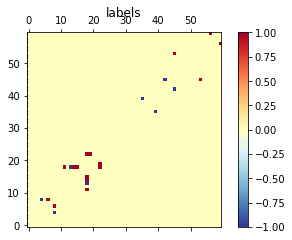

0.84
(60, 60)
Limit: 0.84


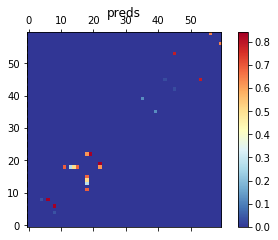

In [17]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )

# SVC

In [18]:
svc = SVC()
from sklearn.svm import SVC as scikit_SVC

# linear - SVM

In [19]:
svc.classifier= scikit_SVC(probability=True, kernel='linear')

### with atac only

In [20]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 55.90%	 auROC: 0.581	 auPRC: 0.618	 auPRG: 0.134
Recall at 5%|10%|20% FDR: 1.7%|1.7%|7.4%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 56.34%	 auROC: 0.574	 auPRC: 0.622	 auPRG: 0.115
Recall at 5%|10%|20% FDR: 1.7%|2.1%|11.5%	 Num Positives: 576	 Num Negatives: 576	 



/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### with genomic locations

In [21]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 68.12%	 auROC: 0.737	 auPRC: 0.734	 auPRG: 0.488
Recall at 5%|10%|20% FDR: 2.6%|18.8%|31.9%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 68.75%	 auROC: 0.735	 auPRC: 0.725	 auPRG: 0.507
Recall at 5%|10%|20% FDR: 1.6%|5.6%|18.1%	 Num Positives: 576	 Num Negatives: 576	 



### with distance only

In [22]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 60.04%	 auROC: 0.626	 auPRC: 0.592	 auPRG: 0.259
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 58.42%	 auROC: 0.609	 auPRC: 0.587	 auPRG: 0.211
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 576	 Num Negatives: 576	 



### w/o genomic locations

In [23]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 62.23%	 auROC: 0.705	 auPRC: 0.717	 auPRG: 0.377
Recall at 5%|10%|20% FDR: 3.1%|13.5%|31.9%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 61.81%	 auROC: 0.699	 auPRC: 0.703	 auPRG: 0.380
Recall at 5%|10%|20% FDR: 2.4%|3.6%|26.9%	 Num Positives: 576	 Num Negatives: 576	 



# RBF - SVM

In [24]:
svc.classifier= scikit_SVC(probability=True, kernel='rbf')

### with atac only

In [25]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 63.76%	 auROC: 0.673	 auPRC: 0.690	 auPRG: 0.342
Recall at 5%|10%|20% FDR: 1.7%|4.8%|34.1%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 65.71%	 auROC: 0.701	 auPRC: 0.716	 auPRG: 0.395
Recall at 5%|10%|20% FDR: 0.2%|0.2%|42.7%	 Num Positives: 576	 Num Negatives: 576	 



### with genomic locations

In [26]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 73.36%	 auROC: 0.799	 auPRC: 0.810	 auPRG: 0.631
Recall at 5%|10%|20% FDR: 11.4%|30.1%|62.9%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 79.95%	 auROC: 0.881	 auPRC: 0.895	 auPRG: 0.807
Recall at 5%|10%|20% FDR: 56.4%|65.6%|80.4%	 Num Positives: 576	 Num Negatives: 576	 



### with distance only

In [27]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 60.70%	 auROC: 0.637	 auPRC: 0.609	 auPRG: 0.270
Recall at 5%|10%|20% FDR: 1.7%|1.7%|1.7%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 58.94%	 auROC: 0.618	 auPRC: 0.568	 auPRG: 0.240
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 576	 Num Negatives: 576	 



### w/o genomic locations

In [28]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 72.05%	 auROC: 0.780	 auPRC: 0.793	 auPRG: 0.602
Recall at 5%|10%|20% FDR: 2.6%|23.1%|62.9%	 Num Positives: 229	 Num Negatives: 229	 

On Train:
Balanced Accuracy: 79.69%	 auROC: 0.871	 auPRC: 0.876	 auPRG: 0.787
Recall at 5%|10%|20% FDR: 17.7%|64.6%|79.5%	 Num Positives: 576	 Num Negatives: 576	 

